## Pumping well near a river in uniform flow

Consider a well pumping near a long and straight river running from North to South along the $y$-axis; the well penetrates the aquifer fully. In absence of the well, the groundwater flow is uniform towards the river at a rate $Q_{x0}$. Heads are measured with respect to the water level in the river, which is approximated as constant. The well is located at $x=-d$, $y=0$, has a radius $r_w$, and a discharge $Q$. The discharge potential in the aquifer consists of the superposition of uniform flow, the pumping well, and an image well:

$$\Phi = -Q_{x0}x + \frac{Q}{4\pi}\ln\left(\frac{r_1^2}{r_2^2}\right)$$

where 

$$r_1^2=(x+d)^2 + y^2 \hspace 2em r_2^2=(x-d)^2 + y^2$$

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from ipywidgets import interact

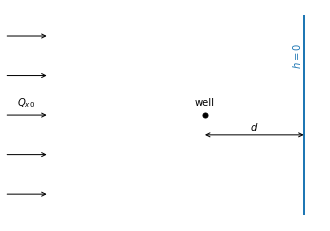

In [2]:
plt.figure(figsize=(8, 4))
plt.plot([0, 0], [-1, 1], 'C0', lw=2)
plt.plot(-1, 0, 'ko', markersize=5)
#plt.text(0.25, 1.25, '$h^*_0$', ha='left')
#plt.text(0.75, 1.15, '$h^*_1$', ha='center')
#plt.plot([0.5, 0.5], [-0.05, -0.15], 'k')
plt.axis('scaled')
plt.xlim(-3, 0.2)
plt.annotate("", va='center',
            xy=(-1, -0.2), 
            xytext=(0, -0.2), 
            arrowprops=dict(arrowstyle="<->", shrinkA=0, shrinkB=0))
for y in np.arange(-0.8, 1.1, 0.4):
    plt.annotate("", va='center',
                xy=(-3, -y), 
                xytext=(-2.6, -y), 
                arrowprops=dict(arrowstyle="<-", shrinkA=0, shrinkB=0))
plt.text(-0.5, -0.15, '$d$', ha='center')
plt.text(-0.13, 0.5, '$h = 0$', rotation=90, color='C0')
plt.text(-1, 0.1, 'well', ha='center')
plt.text(-2.9, 0.1, '$Q_{x0}$')
plt.axis('off');

In [3]:
# parameters
Qx0 = 0.1
Q = 20
d = 100

In [4]:
# solution
def phi(x, y, d=d, Q=Q, Qx0=Qx0):
    r1 = np.sqrt((x + d)**2 + y**2) 
    r2 = np.sqrt((x - d)**2 + y**2)
    return -Qx0 * x + Q / (2 * np.pi) * np.log(r1 / r2)

def psi(x, y, d=d, Q=Q, Qx0=Qx0):
    theta1 = np.arctan2(y, x + d)
    theta2 = np.arctan2(y, x - d)
    return -Qx0 * y + Q / (2 * np.pi) * (theta1 - theta2)

x, y = np.meshgrid(np.linspace(-300, 0, 100), np.linspace(-150, 150, 100))
pot = phi(x, y)
sf = psi(x, y)

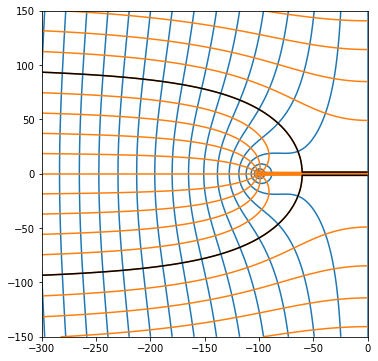

In [7]:
# plot
plt.figure(figsize=(7, 6))
plt.contour(x, y, pot, 20, colors='C0', linestyles='solid')
plt.contour(x, y, sf, 20, colors='C1', linestyles='solid')
plt.contour(x, y, sf, [-Q / 2, Q / 2], colors='k', linestyles='-')
plt.axis('scaled');

It is clear from the flownet, that the well does not pump any water from the river. An obvious question is how much the well can pump before it draws water from the river. This is especially relevant when the river water is of undesirable quality. 

There is a stagnation point between the well and the river. When the discharge of the well is increased, the stagnation point moves to the river. The maximum amount that the well can pump without getting water from the river is when the stagnation point is exactly on the river at $(x,y)=(0,0)$. The discharge corresponding to this case is obtained by setting the horizontal component of the discharge vector $Q_x$ equal to zero at $(x,y)=(0,0)$ (Note that $Q_y=0$ along the entire $x-axis$ due to symmetry). The equation for $Q_x$ is
$$Q_x=Q_{x0} -\frac{Q}{2\pi} \frac{x+d}{r_1^2} + \frac{Q}{2\pi} \frac{x-d}{r_2^2}$$
Setting $Q_x(x=0,y=0)=0$ gives
$$Q_{x0} -\frac{Q}{2\pi} \frac{d}{d^2} - \frac{Q}{2\pi} \frac{d}{d^2}=0$$
so that
$$Q=\pi d Q_{x0}$$

In [6]:
def Qx_along_river(y, d=d, Q=Q, Qx0=Qx0):
    return Qx0 - Q / np.pi * d / (d**2 + y**2)

def plotwell(factor=1):
    Qx0 = 0.1
    d = 100
    Qmax = np.pi * d * Qx0
    Q = factor * Qmax
    x, y = np.meshgrid(np.linspace(-300, 0, 100), np.linspace(-150, 150, 100))
    pot = phi(x, y, Q=Q)
    sf = psi(x, y, Q=Q)
    if factor > 1:
        y0 = fsolve(Qx_along_river, 40)
        psi0 = psi(0, y0, Q=Q)[0]
    else:
        psi0 = Q / 2
    plt.figure(figsize=(7, 7))
    plt.contour(x, y, pot, 20, colors='C0', linestyles='solid')
    plt.contour(x, y, sf, np.arange(-2 * np.abs(psi0), 2 * np.abs(psi0), np.abs(psi0) / 10), colors='C1', linestyles='solid')
    plt.contour(x, y, sf, [-np.abs(psi0), np.abs(psi0)], colors='k', linestyles='solid')
    plt.axis('scaled')

interact(plotwell, factor=(0.5, 1.5, 0.1));

interactive(children=(FloatSlider(value=1.0, description='factor', max=1.5, min=0.5), Output()), _dom_classes=…